# Montecarlo Methods

In [1]:
using Random: seed!

In [2]:
rand()

0.03998991081193137

In [3]:
myseed = 10
seed!(myseed)

Random.TaskLocalRNG()

In [4]:
rand(5)

5-element Vector{Float64}:
 0.3010449871053731
 0.08766509864654615
 0.16064903326900615
 0.1850963164802496
 0.45846711468319445

In [5]:
myseed = 10
seed!(myseed)
rand(5)

5-element Vector{Float64}:
 0.3010449871053731
 0.08766509864654615
 0.16064903326900615
 0.1850963164802496
 0.45846711468319445

In [6]:
using Statistics: mean, std

In [7]:
using PyPlot

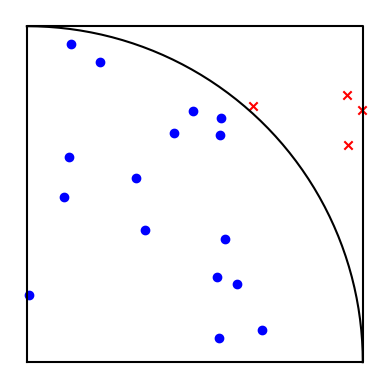

In [8]:
phi = range(0.0, pi/2, 50)
plot(cos.(phi), sin.(phi), color="black")
plot([0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 1.0, 0.0], color="black")
seed = 1234
seed!(seed)
for i = 1:20
    x, y = rand(2)
    if x^2 + y^2 < 1
        mar = "o"
        col = "blue"
    else
        mar = "x"
        col = "red"
    end
    scatter(x, y, marker=mar, color=col)
end
axis("off")
axis("square");

In [9]:
""""
    pi_est = mcpi(m)

Monte Carlo calculation of pi
"""
function mcpi(m)
    s = 0.0
    for i = 1:m
        x,y = rand(2)
        if x^2 + y^2 < 1
            s += 1.0
        end
    end
    return 4*s/m
end

mcpi

In [10]:
mcpi(1000000000)

3.141625992

In [11]:
m = 2^20
k = 256


256

In [13]:
seed = 1
seed!(seed)
res = zeros(k)
for n = 1:k
    #@info n
    res[n] = mcpi(m)
end

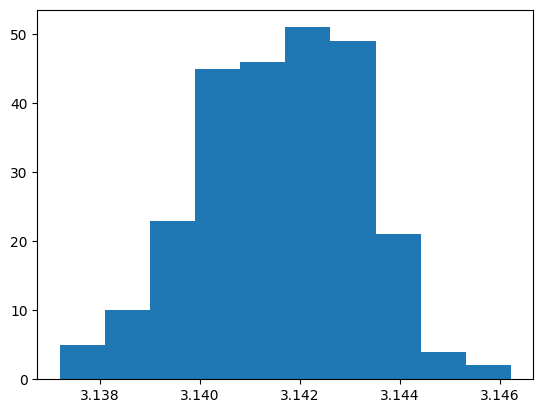

([5.0, 10.0, 23.0, 45.0, 46.0, 51.0, 49.0, 21.0, 4.0, 2.0], [3.13720703125, 3.138107681274414, 3.139008331298828, 3.1399089813232424, 3.1408096313476563, 3.1417102813720703, 3.1426109313964843, 3.1435115814208983, 3.1444122314453127, 3.1453128814697267, 3.1462135314941406], (PyObject <matplotlib.patches.Rectangle object at 0x7afea10f2f90>, PyObject <matplotlib.patches.Rectangle object at 0x7afeabb86000>, PyObject <matplotlib.patches.Rectangle object at 0x7afea10f33b0>, PyObject <matplotlib.patches.Rectangle object at 0x7afea10f35c0>, PyObject <matplotlib.patches.Rectangle object at 0x7afea10f3800>, PyObject <matplotlib.patches.Rectangle object at 0x7afea1098bf0>, PyObject <matplotlib.patches.Rectangle object at 0x7afea10983b0>, PyObject <matplotlib.patches.Rectangle object at 0x7afea109be30>, PyObject <matplotlib.patches.Rectangle object at 0x7afea5251a30>, PyObject <matplotlib.patches.Rectangle object at 0x7afea112c1a0>))

In [14]:
hist(res)

In [15]:
n = 12
nps = zeros(Int64, n)
pis = zeros(n)
pistds = zeros(n);

In [16]:
k = 256               # the number of MC runs with a fixed number of MC steps
res = zeros(k)        # storage for the results of `k' MC runs
ns = zeros(Int64, k); # working array of integers

In [17]:
@time for i = 1:n
    nps[i] = 2^(i+10)
    @info i, nps[i]
    fill!(ns, nps[i])  # fill the array `ns` with values of np[i]
    res .= mcpi.(ns)   # run mce() k times and store the results to array `res`
    pis[i] = mean(res)
    pistds[i] = std(res, mean=pis[i])/sqrt(k)  # the stds
end

[ Info: (1, 2048)
[ Info: (2, 4096)
[ Info: (3, 8192)
[ Info: (4, 16384)
[ Info: (5, 32768)
[ Info: (6, 65536)
[ Info: (7, 131072)
[ Info: (8, 262144)
[ Info: (9, 524288)
[ Info: (10, 1048576)
[ Info: (11, 2097152)
[ Info: (12, 4194304)


 60.070969 seconds (4.29 G allocations: 159.978 GiB, 15.41% gc time, 0.40% compilation time)


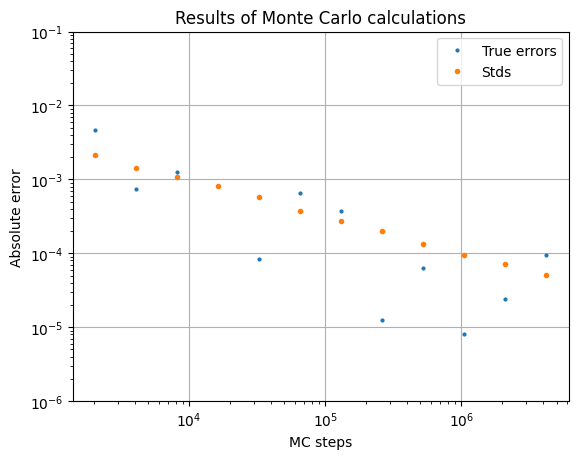

In [18]:
loglog(nps, abs.(pis .- pi), label="True errors", marker="o", markersize=2, linestyle="none")
loglog(nps, pistds, label="Stds", marker="o", markersize=3, linestyle="none")
ylim(1e-6, 1e-1)
grid(true)
xlabel("MC steps")
ylabel("Absolute error")
title("Results of Monte Carlo calculations")
legend();

In [19]:
function linear_regression(x, y)
    np = length(x)
    xbar = sum(x)/np
    ybar = sum(y)/np
    x2 = sum((x .- xbar) .^ 2)
    beta = sum((y .- ybar) .* (x .- xbar))/x2
    alpha = ybar - beta*xbar
    sigma = sqrt(sum((y .- alpha .- beta .* x) .^ 2)/((np - 2)*x2))
    return alpha, beta, sigma
end

linear_regression (generic function with 1 method)

In [20]:
alpha, beta, sigma = linear_regression(log.(nps), log.(pistds));

In [21]:
round(beta, sigdigits = 3)

-0.491

In [22]:
round(sigma, sigdigits=3)

0.0055

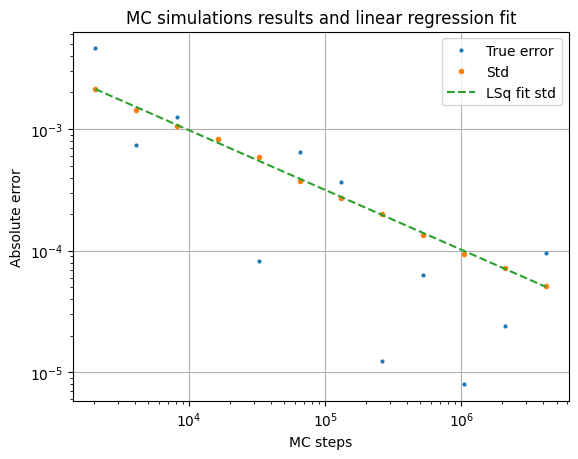

In [23]:
loglog(nps, abs.(pis .- pi), label="True error", marker="o", markersize=2, linestyle="none")
loglog(nps, pistds, label="Std", marker="o", markersize=3, linestyle="none")
loglog(nps, exp.(alpha .+ beta .* log.(nps)), label="LSq fit std", linestyle="dashed")
grid(true)
xlabel("MC steps")
ylabel("Absolute error")
title("MC simulations results and linear regression fit")
legend();